# Multiple linear regression

Unlike the simple linear regression model, the multiple linear regression model is defined as any linear regression model with at least two explanatory variables. But what do we do when we have several variables? This is what we will see in this chapter. And you will finally be able to measure all the power of linear regression despite its simplicity!

## Data

First of all, we will load our dataset. This is a fake dataset for the example. 

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("./data/data_multi.csv")

In [5]:
df

,x_1,x_2,y
0,1.054452,-1.070753,-81.464433
1,-0.362741,-0.634322,-78.752795
2,-0.854096,0.313068,2.218414
3,1.326386,0.298238,52.234160
4,-0.461585,-1.315907,-159.639258
...,...,...,...
95,0.823504,0.771791,86.316340
96,0.976639,0.208275,83.136943
97,-1.347759,1.883151,157.404615
98,0.052165,-1.104383,-136.511136


In [247]:
df.shape

(100, 3)

As you can see we now have 100 rows, 2 features and 1 target.

**Exercise:** Create the `X` and `y` variables and define which column will be the target and which column will be the feature. 
They must be of type `numpy.ndarray`. Our variable `X` has two dimensions this time.

In [16]:
import numpy as np

y = np.array(df['y'])
X = np.array(df.drop('y', axis=1))
X

array([[ 1.05445173, -1.07075262],
       [-0.36274117, -0.63432209],
       [-0.85409574,  0.3130677 ],
       [ 1.3263859 ,  0.29823817],
       [-0.4615846 , -1.31590741],
       [ 1.94362119, -1.17312341],
       [-1.60205766,  0.62523145],
       [-0.40178094,  0.17742614],
       [-0.97727788,  1.86755799],
       [ 0.37816252,  0.15494743],
       [-0.30230275, -0.38732682],
       [-0.74745481, -0.41361898],
       [-0.18718385,  0.04575852],
       [ 0.31872765,  0.92085882],
       [-1.53624369,  0.46566244],
       [ 0.40015721,  1.76405235],
       [-0.82643854, -0.74475482],
       [-0.74216502,  0.8644362 ],
       [ 0.70657317,  0.3563664 ],
       [ 0.90082649, -1.16514984],
       [-0.57884966, -0.87079715],
       [-0.20829876,  0.57659082],
       [ 0.68159452, -1.03424284],
       [ 0.8024564 , -0.26800337],
       [ 0.77749036, -1.25279536],
       [-1.5447711 , -1.00021535],
       [ 0.96939671, -1.270485  ],
       [ 0.67643329, -0.63584608],
       [ 1.78587049,

### Relationship between variables

To represent a dataset that has two features, we can use 3D visualization.

**Exercise:** Use a 3D matplotlib (or other) graph to view the dataset. 

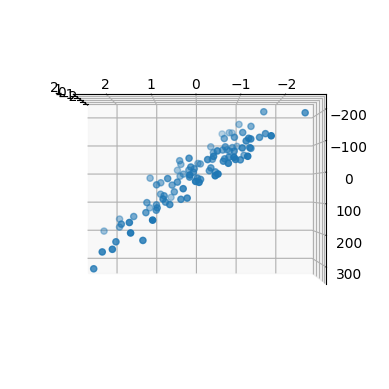

In [23]:
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
ax.view_init(180, 180)
ax.scatter(df['x_1'], df['x_2'], df['y'])

If you change the camera angle, you should come across something that looks like this: 

<img src="./assets/3dplot.png" />

This appears to be a positive linear correlation. What do you say?  


If our dataset has more than two dimensions, then we won't be able to display it in 3D. Unfortunately for us, the human being can only perceive 3 dimensions. In this case, we will have no other choice than to display one scatter plot per variable.

And it is there that we realize that the linear regression may be very simple, as soon as we go beyond 3 dimensions, the human being will hardly be able to visualize all the data while the machines are doing very well.

**Exercise:** Create a scatter plot for each variable with respect to the target. You may use  `plt.tight_layout()` after plotting if the graph is too cramped.

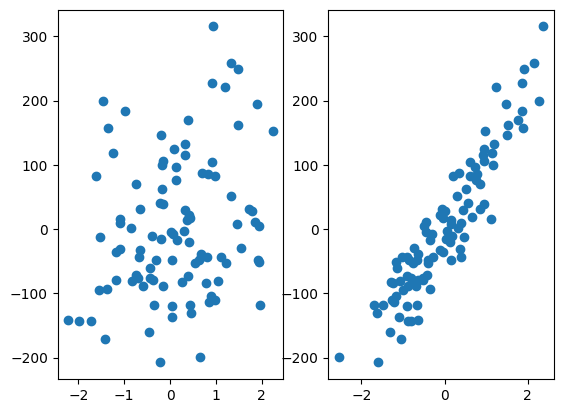

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].scatter(df['x_1'], df['y'])
ax[1].scatter(df['x_2'], df['y'])
plt.show()

**Exercise:** Show correlation coefficients. 

In [38]:
np.corrcoef(df['x_1'], df['y'])
np.corrcoef(df['x_2'], df['y'])

array([[1.        , 0.93029924],
       [0.93029924, 1.        ]])

### Split the dataset

You now know the process!

**Exercise:** Import `train_test_split` from `sklearn` and split the dataset and create the variables `X_train`, `X_test`, `y_train`, `y_test`.

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)


[[ 0.0519454  -0.90729836]
 [ 1.11701629 -0.91282223]
 [ 1.48051479  1.92294203]
 [-0.66347829 -0.09845252]
 [ 1.89588918  1.48825219]
 [-1.07993151  1.12663592]
 [ 0.68159452 -1.03424284]
 [-1.09940079  0.37642553]
 [-0.30230275 -0.38732682]
 [ 1.05445173 -1.07075262]
 [ 0.70657317  0.3563664 ]
 [ 0.05616534 -0.31155253]
 [ 1.71334272 -0.06824161]
 [-1.23482582  1.13940068]
 [ 0.94447949  2.38314477]
 [-0.4615846  -1.31590741]
 [-1.42001794 -1.04855297]
 [ 0.4393917  -1.49125759]
 [-0.18718385  0.04575852]
 [-0.21274028 -1.61389785]]


##  Load and fit the model (with scikit-learn)

How to use `sklearn` now with multiple features? Well, it's simple, you don't need to change anything as `sklearn` takes care of everything for you.

1. Import `LinearRegression` from `sklearn`
2. Create a `regressor` variable and instantiate your `LinearRegression` class.
3. Train your model with `X_train` and `y_train`.
4. Display the score of your model with `X_train` and `y_train`.
5. Use the predict method of your model on your test dataset (`X_test`).
6. Display the score of your model with `X_test` and `y_test`.

In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

model.score(X_train, y_train)

pred = model.predict(X_test)

model.score(X_test, y_test)


0.9418412685059916

And voilà!